In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
data = pd.read_csv("melb_data.csv")

In [3]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [4]:
data.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

In [5]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:
data.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [7]:
data[["Day", "Month", "Year"]] = (
    data["Date"]
    .str
    .split("/", expand=True)
).astype(int)

In [8]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Day,Month,Year
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,3,12,2016
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,4,2,2016
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,4,3,2017
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,4,3,2017
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,4,6,2016


array([[<AxesSubplot: title={'center': 'Rooms'}>,
        <AxesSubplot: title={'center': 'Price'}>,
        <AxesSubplot: title={'center': 'Distance'}>,
        <AxesSubplot: title={'center': 'Postcode'}>],
       [<AxesSubplot: title={'center': 'Bedroom2'}>,
        <AxesSubplot: title={'center': 'Bathroom'}>,
        <AxesSubplot: title={'center': 'Car'}>,
        <AxesSubplot: title={'center': 'Landsize'}>],
       [<AxesSubplot: title={'center': 'BuildingArea'}>,
        <AxesSubplot: title={'center': 'YearBuilt'}>,
        <AxesSubplot: title={'center': 'Lattitude'}>,
        <AxesSubplot: title={'center': 'Longtitude'}>],
       [<AxesSubplot: title={'center': 'Propertycount'}>,
        <AxesSubplot: title={'center': 'Day'}>,
        <AxesSubplot: title={'center': 'Month'}>,
        <AxesSubplot: title={'center': 'Year'}>]], dtype=object)

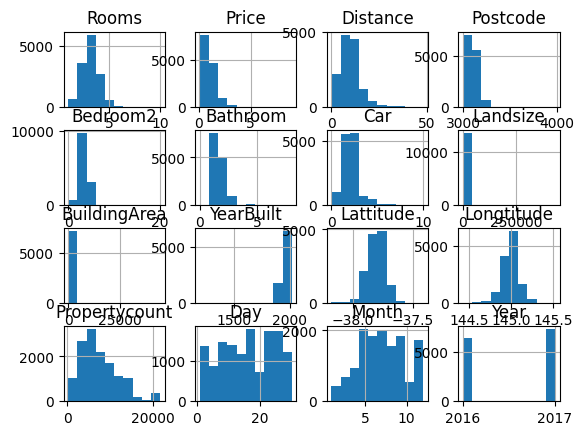

In [9]:
data.hist()

In [10]:
data_copy = data.copy().dropna()
y = data_copy.Price
X = data_copy.drop("Price", axis=1)

In [11]:
X

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Day,Month,Year
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,...,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,4,2,2016
2,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,...,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,4,3,2017
4,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,...,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,4,6,2016
6,Abbotsford,124 Yarra St,3,h,S,Nelson,7/05/2016,2.5,3067.0,4.0,...,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0,7,5,2016
7,Abbotsford,98 Charles St,2,h,S,Nelson,8/10/2016,2.5,3067.0,2.0,...,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0,8,10,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,Whittlesea,30 Sherwin St,3,h,S,Ray,29/07/2017,35.5,3757.0,3.0,...,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0,29,7,2017
12206,Williamstown,75 Cecil St,3,h,VB,Williams,29/07/2017,6.8,3016.0,3.0,...,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0,29,7,2017
12207,Williamstown,2/29 Dover Rd,1,u,SP,Williams,29/07/2017,6.8,3016.0,1.0,...,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0,29,7,2017
12209,Windsor,201/152 Peel St,2,u,PI,hockingstuart,29/07/2017,4.6,3181.0,2.0,...,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0,29,7,2017


In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)

In [21]:
X_train

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Day,Month,Year
8722,3,10.5,3020.0,3.0,1.0,0.0,423.0,142.00,1920.0,-37.77917,144.82223,2185.0,1,7,2017
3418,3,7.9,3079.0,3.0,2.0,2.0,0.0,96.00,2000.0,-37.76940,145.04060,5549.0,28,8,2016
9904,4,20.4,3059.0,4.0,2.0,2.0,494.0,298.21,2014.0,-37.61424,144.88705,4864.0,24,6,2017
9024,4,23.2,3153.0,4.0,3.0,2.0,304.0,155.00,1970.0,-37.85430,145.25253,5030.0,3,6,2017
6946,4,12.4,3060.0,4.0,2.0,2.0,607.0,338.00,2015.0,-37.71600,144.96630,5070.0,28,5,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,5,9.0,3126.0,5.0,4.0,4.0,684.0,427.00,2013.0,-37.83200,145.08530,3265.0,18,3,2017
10165,2,5.2,3055.0,2.0,1.0,1.0,54.0,60.00,1970.0,-37.75948,144.94758,7082.0,27,5,2017
7403,2,5.3,3032.0,2.0,1.0,1.0,0.0,51.00,2012.0,-37.78470,144.93830,1052.0,28,5,2016
404,4,11.0,3147.0,4.0,2.0,2.0,844.0,278.00,1940.0,-37.87150,145.06880,3052.0,28,5,2016


In [39]:
categorical_columns = [cname for cname in X_train.columns
                      if X_train[cname].dtype == "object"]
categorical_columns

[]

In [42]:
X_train = X_train.drop(categorical_columns, axis=1)
X_val = X_val.drop(categorical_columns, axis=1)
X_val

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Day,Month,Year
6048,3,13.3,3020.0,3.0,3.0,2.0,221.0,155.0,2011.0,-37.77080,144.8401,4217.0,26,7,2016
9186,4,6.2,3123.0,4.0,2.0,2.0,528.0,199.0,1980.0,-37.83539,145.0431,6482.0,3,6,2017
3991,3,2.8,3000.0,3.0,2.0,1.0,0.0,122.0,1998.0,-37.80950,144.9691,17496.0,15,10,2016
5829,3,6.1,3182.0,3.0,2.0,2.0,1039.0,133.0,2006.0,-37.86380,144.9820,13240.0,18,3,2017
3616,6,5.6,3101.0,6.0,6.0,3.0,1334.0,365.0,1890.0,-37.80290,145.0267,10331.0,13,8,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,2,13.9,3165.0,2.0,1.0,1.0,0.0,75.0,1960.0,-37.90820,145.0681,10969.0,8,10,2016
5926,3,12.6,3020.0,3.0,1.0,1.0,700.0,145.0,1960.0,-37.79330,144.8411,3755.0,3,12,2016
20,4,2.5,3067.0,4.0,2.0,2.0,780.0,135.0,1900.0,-37.80730,144.9952,4019.0,18,3,2017
3935,3,8.7,3032.0,3.0,2.0,2.0,151.0,3.0,2010.0,-37.78550,144.8958,4918.0,16,4,2016


In [43]:
y_val

6048     620000.0
9186    2320000.0
3991     750000.0
5829    1120000.0
3616    6500000.0
          ...    
829      486500.0
5926     950000.0
20      1330000.0
3935     865000.0
2493    1160000.0
Name: Price, Length: 1549, dtype: float64

In [44]:
model = XGBRegressor()

In [45]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

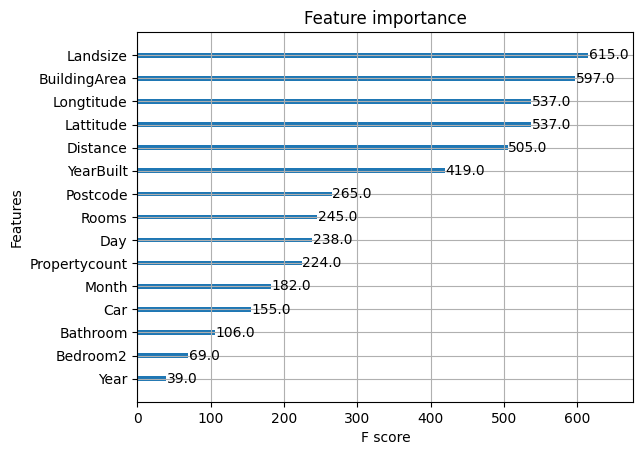

In [46]:
xgb.plot_importance(model, ax=plt.gca())
plt.show()

# Train Performance


In [47]:
pred_train = model.predict(X_val)

In [48]:
r2_score(y_val, pred_train)

0.756876222168556

In [49]:
mean_absolute_error(y_val, pred_train)

169878.59013375564